In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os

In [2]:
#Images used are from Michigan from August 1, 2021 to August 31,2021. 

In [3]:
band4 = rasterio.open('LC08_L1TP_020030_20210820_20210827_01_T1_B4.TIF') #red

In [4]:
band5 = rasterio.open('LC08_L1TP_020030_20210820_20210827_01_T1_B5.TIF') #nir

In [5]:
#number of raster rows
band4.height

8021

In [6]:
#number of raster columns
band4.width

7901

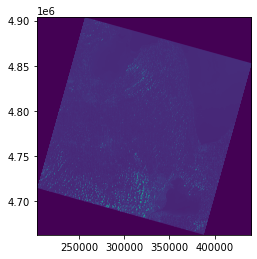

<AxesSubplot:>

In [7]:
#plot band 
plot.show(band4)

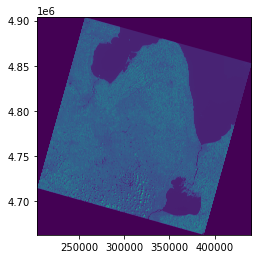

<AxesSubplot:>

In [8]:
#plot band 
plot.show(band5)

In [9]:
#type of raster byte for type of bytes, shows integer 16 and must be converted to float 64
band4.dtypes[0]

'uint16'

In [10]:
band4.bounds

BoundingBox(left=203085.0, bottom=4662885.0, right=440115.0, top=4903515.0)

In [11]:
#raster sytem of reference, shows special attributes of the raster
band4.crs

CRS.from_epsg(32617)

In [12]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 203085.0,
       0.0, -30.0, 4903515.0)

In [13]:
#raster values as matrix array, no fractional decimals
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

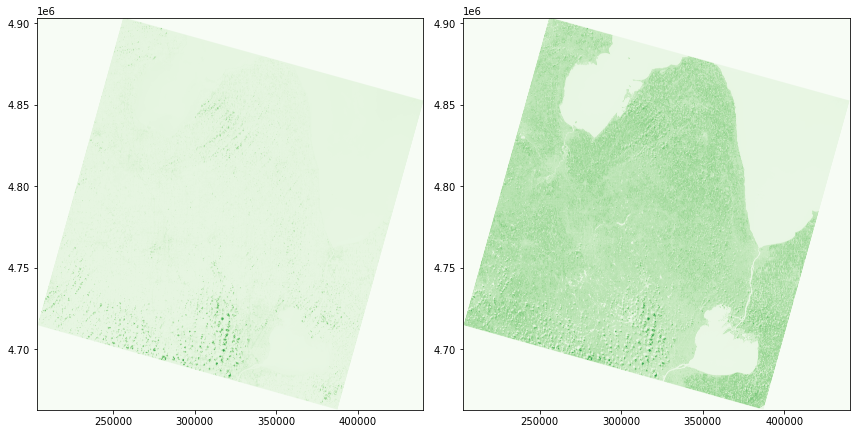

In [14]:
#multiple band representation; this shows the near infrared is reflected in parts and red band is absorbed in certain parts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Greens') #red
plot.show(band5, ax=ax2, cmap='Greens') #nir
fig.tight_layout()

In [15]:
#generate nir and red objects as arrays in float64 format because NDVI needs float64.
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
#ndvi calculation, empty cells or nodata cells are reported as 0 to fractional decimals.
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

C:\Users\Kip\AppData\Local\Temp\ipykernel_11920\605088843.py:5: RuntimeWarning: invalid value encountered in true_divide
  (nir-red)/(nir+red))


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [17]:
#export ndvi image as output image file, rasterio.open opens the file
#w is for write, width and height are from input parameters, count=1 means 1 band, 
ndviImage = rasterio.open('output/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

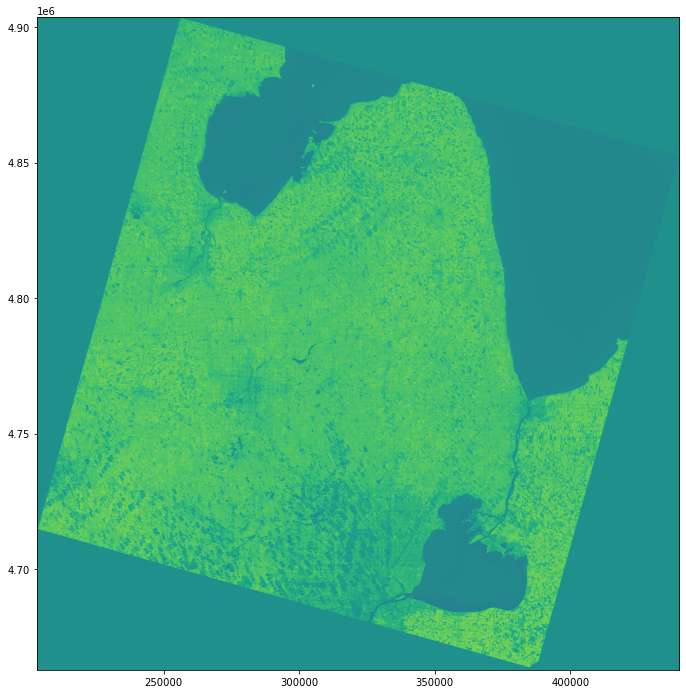

<AxesSubplot:>

In [18]:
#plot ndvi output image
ndvi = rasterio.open('output/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)


See further analysis and examples at my Github Page.  